<a href="https://colab.research.google.com/github/h4r1c0t/WildCodeSchool/blob/master/LiveCoding/%2312_linear_regression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data: https://raw.githubusercontent.com/pramodini18/Fish-weight-prediction/master/Fish.csv



*   Species: species name of fish 
*   Length1: vertical length in cm
*   Length2: diagonal length in cm  
*   Length3: cross length in cm
*   Height: height in cm  
*   Width: diagonal width in cm 
*   **Weight**: weight of fish in Gram g 

Weight prediction model

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression

import seaborn as sns

In [0]:
sns.set()

In [0]:
df_fish = pd.read_csv("https://raw.githubusercontent.com/pramodini18/Fish-weight-prediction/master/Fish.csv")
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [0]:
df_fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [0]:
df_fish.sort_values(by='Weight')

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
...,...,...,...,...,...,...,...
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440


In [0]:
df_fish = df_fish[df_fish.Weight != 0]

In [0]:
df_fish.sort_values(by='Weight')

,Species,Weight,Length1,Length2,Length3,Height,Width,Length3_sq
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080,77.44
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476,116.64
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484,134.56
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600,134.56
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852,158.76
...,...,...,...,...,...,...,...,...
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165,2070.25
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849,3564.09
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440,4096.00
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440,4096.00


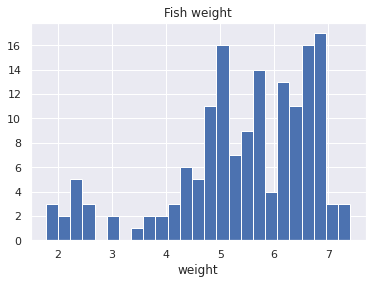

In [0]:
plt.hist(np.log(df_fish['Weight']), bins = 25)
plt.title('Fish weight')
plt.xlabel('weight')
plt.show()

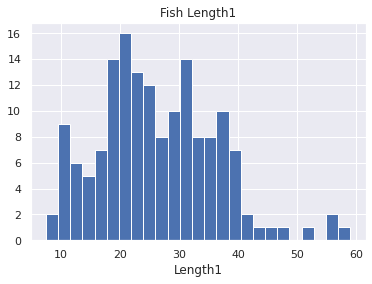

In [0]:
plt.hist(df_fish['Length1'], bins = 25)
plt.title('Fish Length1')
plt.xlabel('Length1')
plt.show()

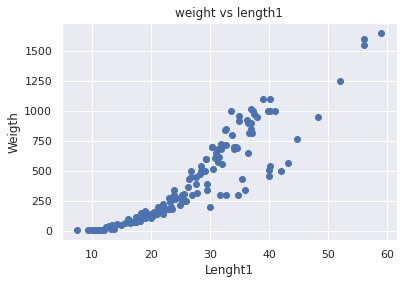

In [0]:
plt.plot(df_fish['Length1'], df_fish['Weight'], linestyle = 'None', marker = 'o')
plt.xlabel('Lenght1')
plt.ylabel('Weigth')
plt.title('weight vs length1')
plt.show()

Modèle

In [0]:
linreg = LinearRegression()

In [0]:
X = df_fish[['Length1']]
y = df_fish['Weight']

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(linreg.coef_, linreg.intercept_)

[32.7176962] -459.40016021654435


In [0]:
Xs = np.linspace(df_fish[['Length1']].min(), df_fish[['Length1']].max(), num=150)
Ys = linreg.coef_*Xs + linreg.intercept_

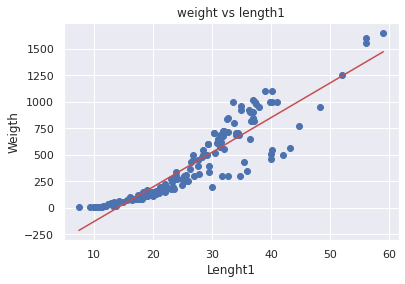

In [0]:
plt.plot(df_fish['Length1'], df_fish['Weight'], linestyle = 'None', marker = 'o')
plt.plot(Xs, Ys, color = 'r')
plt.xlabel('Lenght1')
plt.ylabel('Weigth')
plt.title('weight vs length1')
plt.show()

In [0]:
linreg.score(X, y)

0.8385421598112646

In [0]:
df_fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [0]:
cols = ['Length1', 'Length2', 'Length3', 'Height','Width']
y = df_fish['Weight']

for col in cols:
  X = df_fish[[col]]  
  linreg.fit(X, y)
  print(col, linreg.score(X, y))

Length1 0.8385421598112646
Length2 0.8438317338344943
Length3 0.852095743638909
Height 0.5239694300211302
Width 0.7861546760374312


2 dimensions

In [0]:
linreg2 = LinearRegression()

In [0]:
X = df_fish[['Length2','Length3']]
y = df_fish['Weight']

linreg2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Weight = linreg2.coef_[0] * Length2 + linreg2.coef_[1] * Length3 + constante

In [0]:
print(linreg2.coef_, linreg2.intercept_)

[ 2.75365821 25.87039819] -486.77355785614543


In [0]:
linreg2.score(X, y)

0.8521762765495365

avec toutes les variables explicatives

In [0]:
linreg3 = LinearRegression()

In [0]:
X = df_fish[cols]
y = df_fish['Weight']

linreg3.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(X)

     Length1  Length2  Length3   Height   Width
0       23.2     25.4     30.0  11.5200  4.0200
1       24.0     26.3     31.2  12.4800  4.3056
2       23.9     26.5     31.1  12.3778  4.6961
3       26.3     29.0     33.5  12.7300  4.4555
4       26.5     29.0     34.0  12.4440  5.1340
..       ...      ...      ...      ...     ...
154     11.5     12.2     13.4   2.0904  1.3936
155     11.7     12.4     13.5   2.4300  1.2690
156     12.1     13.0     13.8   2.2770  1.2558
157     13.2     14.3     15.2   2.8728  2.0672
158     13.8     15.0     16.2   2.9322  1.8792

[158 rows x 5 columns]


y = a*X + b

In [0]:
print(linreg3.coef_, linreg3.intercept_)

[ 63.96945622  -9.10851306 -28.11886474  27.9262076   23.41231976] -496.80227301388106


In [0]:
linreg3.score(X, y)

0.8854815220690124

avec polynome

In [0]:
df_fish['Length3_sq'] = df_fish['Length3']**2
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Length3_sq
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,900.00
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,973.44
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,967.21
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1122.25
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1156.00


In [0]:
linreg4 = LinearRegression()

In [0]:
X = df_fish[['Length3', 'Length3_sq']]
y = np.log(df_fish['Weight'])

linreg4.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(linreg4.coef_, linreg4.intercept_)

[ 0.26968356 -0.00247998] -0.2660763757060298


In [0]:
Xs = np.linspace(df_fish[['Length1']].min(), df_fish[['Length1']].max(), num=150)
Ys = linreg4.coef_[0]*Xs + linreg4.coef_[1]*Xs**2 + linreg4.intercept_

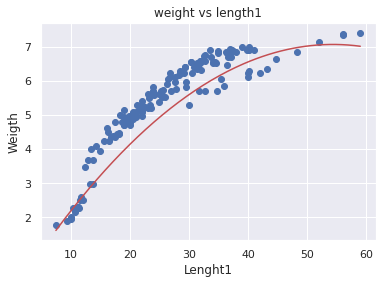

In [0]:
plt.plot(df_fish['Length1'], np.log(df_fish['Weight']), linestyle = 'None', marker = 'o')
plt.plot(Xs, Ys, color = 'r')
plt.xlabel('Lenght1')
plt.ylabel('Weigth')
plt.title('weight vs length1')
plt.show()

In [0]:
linreg4.score(X, y)

0.946337515466121